# 1-Package imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.tree import plot_tree


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# 1-Compréhension du domaine métier et des données

In [2]:
# Charger les données
data = pd.read_csv("waterQuality1.csv")

In [3]:
# Afficher les premières lignes du dataframe
print(data.head())

   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  is_saf

In [4]:
# Informations sur le dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu


## Ce jeu de données comprend :
* 7999 échantillons.
* 20 caractéristiques chimiques différentes.
* Deux colonnes, ammonia et is_safe, sont de type object, ce qui suggère qu'elles peuvent contenir des données non numériques ou catégoriques.
* Les autres variables contiennent des valeurs numériques de type float64.
* La variable "is_safe" setree être la variable cible pour la prédiction de la sûreté de l'eau.
* Les valeurs de la variable "is_safe" devront probablement être converties en types numériques pour être utilisées dans des modèles de machine lea l'eau.

In [5]:
data.is_safe.value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

Le résultat de data.is_safe.value_counts() montre la répartition des valeurs dans la colonne 'is_safe'.
Nous avons 7084 occurrences de la valeur 0 et 912 occurrences de la valeur 1.
Il y a également 3 occurrences de la valeur '#NUM!', ce qui pourrait être une valeur aberrante ou manquante à traiter.
La visualisation avec sns.countplot montre clairement cette répartition.
Nous devrons envisager de gérer les valeurs '#NUM!' lors de l'analyse des données.

In [6]:
# Statistiques descriptives
print(data.describe())

         aluminium      arsenic       barium      cadmium   chloramine  \
count  7999.000000  7999.000000  7999.000000  7999.000000  7999.000000   
mean      0.666158     0.161445     1.567715     0.042806     2.176831   
std       1.265145     0.252590     1.216091     0.036049     2.567027   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.040000     0.030000     0.560000     0.008000     0.100000   
50%       0.070000     0.050000     1.190000     0.040000     0.530000   
75%       0.280000     0.100000     2.480000     0.070000     4.240000   
max       5.050000     1.050000     4.940000     0.130000     8.680000   

          chromium       copper     flouride     bacteria      viruses  \
count  7999.000000  7999.000000  7999.000000  7999.000000  7999.000000   
mean      0.247226     0.805857     0.771565     0.319665     0.328583   
std       0.270640     0.653539     0.435373     0.329485     0.378096   
min       0.000000     0.000000     0

# 3-visualisation des données

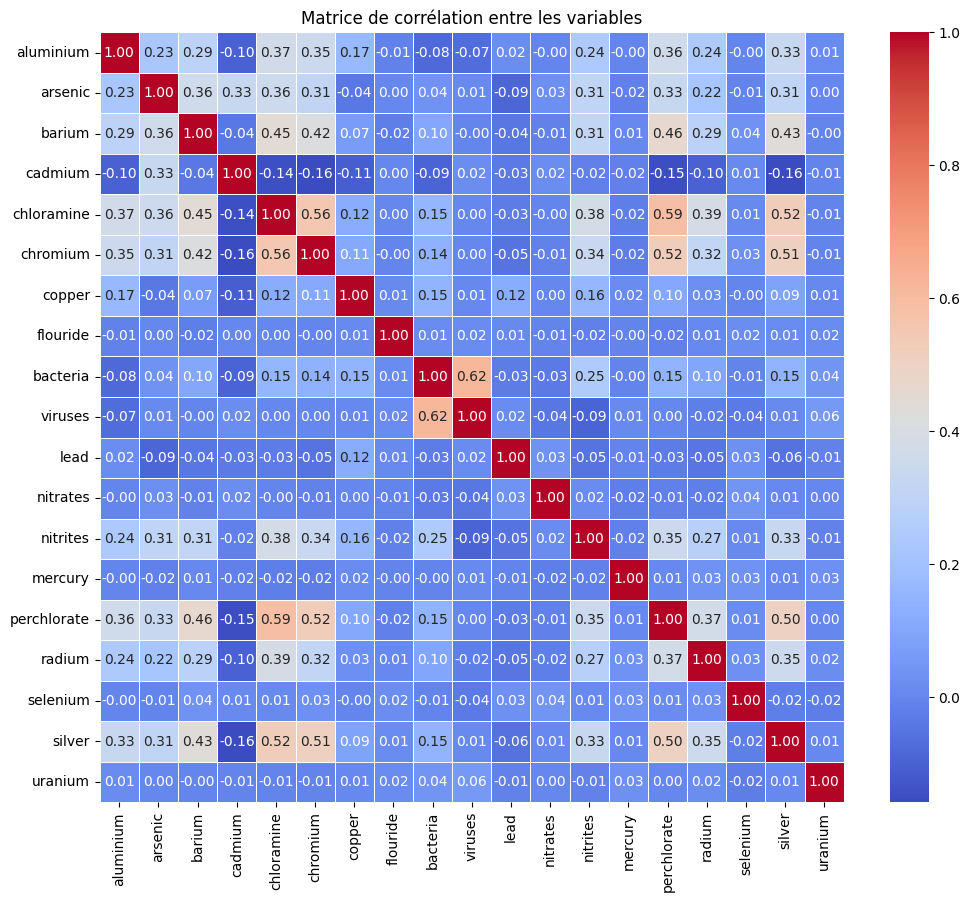

In [7]:
# Supprimer les colonnes non numériques pour la visualisation
data_numeric = data.drop(columns=['ammonia', 'is_safe'])

# Matrice de corrélation
corr = data_numeric.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation entre les variables')
plt.show()

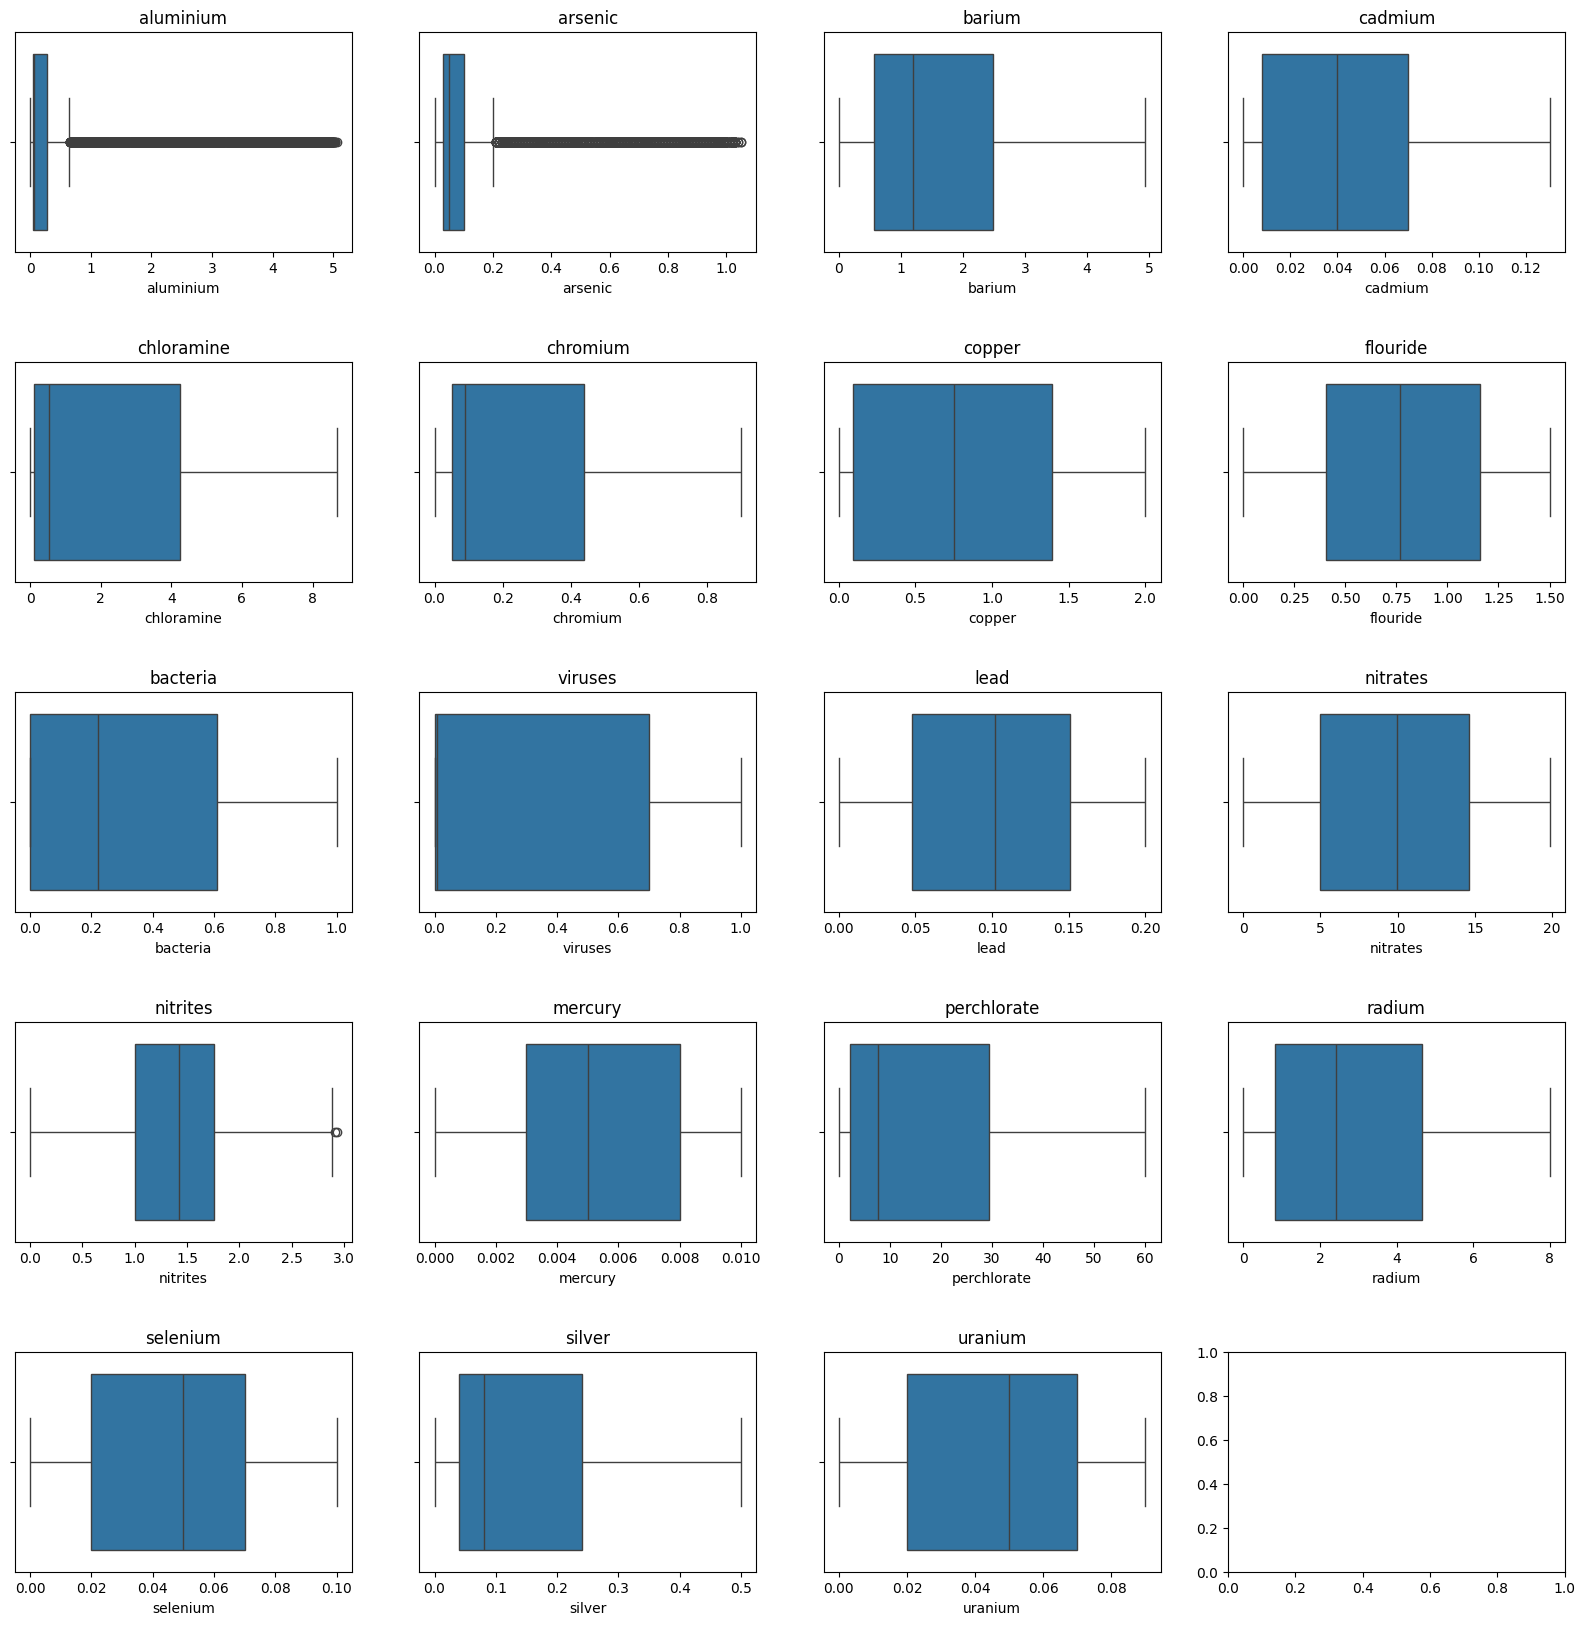

In [8]:
# Création de sous-graphiques pour chaque variable
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Tracé des boxplots pour chaque variable
for i, col in enumerate(data_numeric.columns):
    sns.boxplot(x=data[col], ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)

plt.show()


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

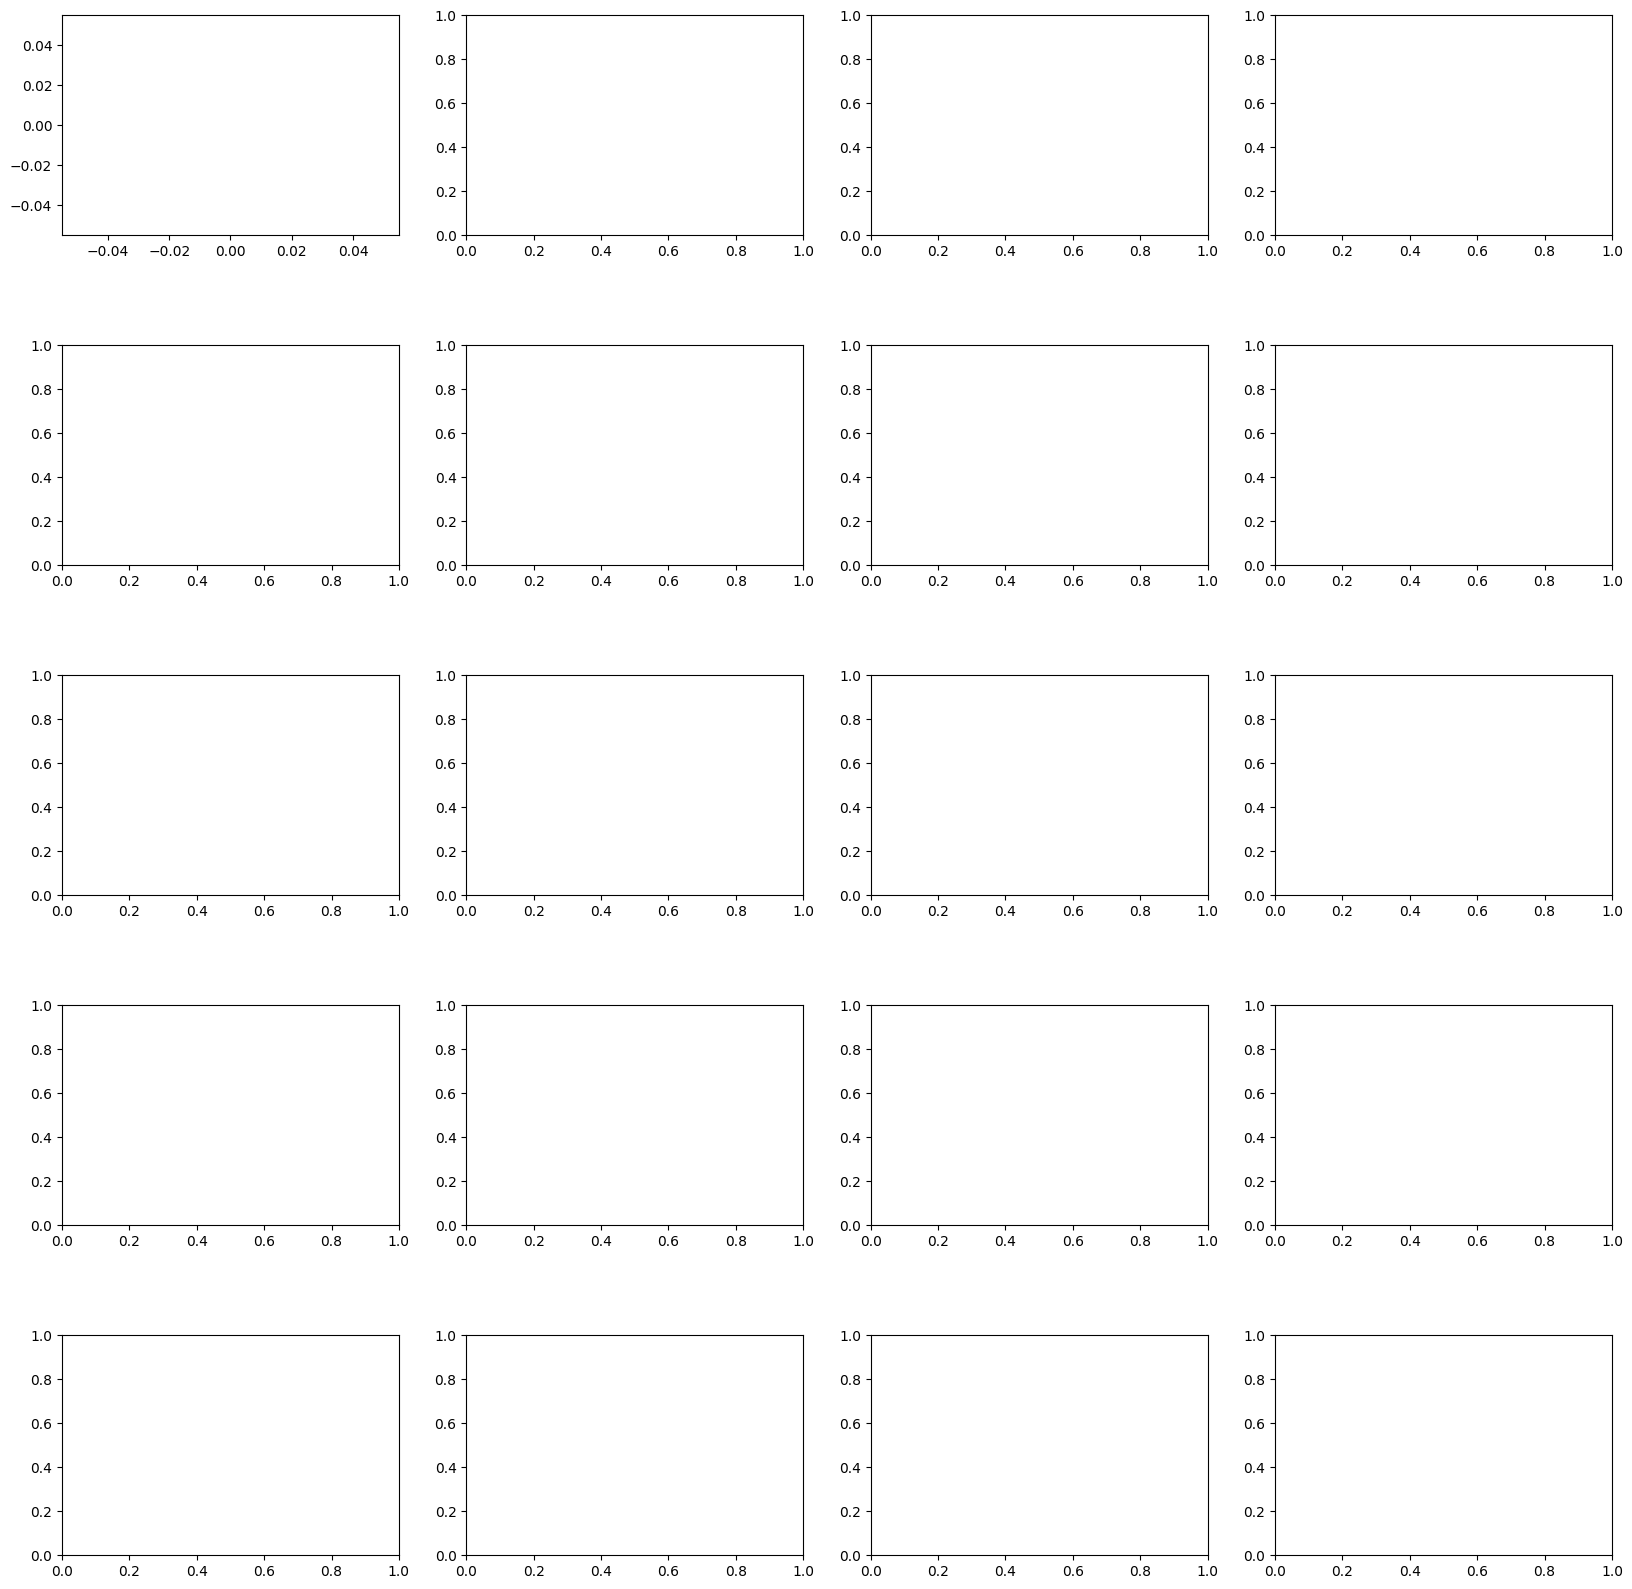

In [9]:
# Création de sous-graphiques pour chaque variable
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Tracé des graphiques de densité pour chaque variable
for i, col in enumerate(data_numeric.columns):
    sns.kdeplot(data[col], ax=axes[i//4, i%4], fill=True)
    axes[i//4, i%4].set_title(col)

plt.show()


In [ ]:
# Afficher un boxplot pour chaque variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot des variables')
plt.xticks(rotation=90)
plt.show()

# 4- Pré-traitement des donneés

In [10]:
# Supprimer les colonnes non numériques et gérer les valeurs manquantes
data_numeric = data.select_dtypes(include=['float64'])
data_numeric = data_numeric.fillna(data_numeric.median())

# Assurez-vous que y a le même nombre d'échantillons que data_numeric
y = data['is_safe'].copy()
y = y[:len(data_numeric)]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data_numeric, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 5-Équilibrage des classes avec BorderlineSMOTE :
*  Le déséquilibre de classe est un problème courant dans de nombreux ensembles de données où une classe est fortement sous-représentée par rapport à une autre. Dans notre ensemble de données, nous avons observé un déséquilibre significatif entre les classes "is_safe". Par exemple, la classe "is_safe=0" compte 7084 observations, tandis que la classe "is_safe=1" ne compte que 912 observations.
*  
Pour résoudre ce problème de déséquilibre de classe, nous avons utilisé une technique appelée BorderlineSMOTE. BorderlineSMOTE est une extension de l'algorithme SMOTE (Synthetic Minority Over-sampling Technique) qui génère des données synthétiques uniquement à partir des exemples de la classe minoritaire qui sont proches de la frontière de décision entre les classes.

In [11]:
# Appliquer BorderlineSMOTE pour équilibrer les classes
smote = BorderlineSMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# 6-sélection des caractéristiques les plus pertinentes 

In [12]:
# Créer un modèle d'arbre de décision
tree_clf = DecisionTreeClassifier(random_state=42)

# Adapter le modèle aux données d'entraînement
tree_clf.fit(X_train_resampled, y_train_resampled)

# Sélectionner les caractéristiques les plus importantes
feature_selection = SelectFromModel(tree_clf, prefit=True)

# Appliquer la sélection des caractéristiques aux ensembles d'entraînement et de test
X_train_selected = feature_selection.transform(X_train_resampled)
X_test_selected = feature_selection.transform(X_test_scaled)

# Obtenez les indices des caractéristiques sélectionnées
selected_feature_indices = feature_selection.get_support(indices=True)

# Obtenez les noms des caractéristiques après la sélection
selected_feature_names = X_train.columns[selected_feature_indices]

# Affichez les noms des caractéristiques sélectionnées
print("Caractéristiques sélectionnées :", selected_feature_names)


# Afficher les dimensions des ensembles d'entraînement et de test après sélection des caractéristiques
print("Dimensions de l'ensemble d'entraînement après sélection des caractéristiques :", X_train_selected.shape)
print("Dimensions de l'ensemble de test après sélection des caractéristiques :", X_test_selected.shape)

Caractéristiques sélectionnées : Index(['aluminium', 'cadmium', 'nitrates', 'nitrites', 'perchlorate', 'silver',
       'uranium'],
      dtype='object')
Dimensions de l'ensemble d'entraînement après sélection des caractéristiques : (11371, 7)
Dimensions de l'ensemble de test après sélection des caractéristiques : (1600, 7)


# 7-Machine learning

## 1-Entraînement et évaluation du modèle Random Forest :

In [13]:
# Entraîner un classificateur RandomForest sur les données d'entraînement équilibrées et sélectionnées
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_selected, y_train_resampled)

# Faire des prédictions sur les données de test sélectionnées
y_pred = clf.predict(X_test_selected)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher la matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix_rf)

Accuracy: 0.934375
Confusion Matrix:
 [[1338   62]
 [  43  157]]


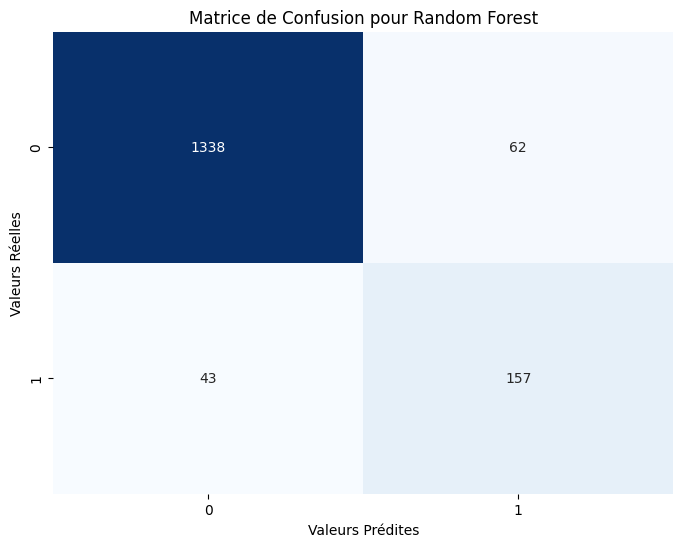

In [14]:
# Affichage de la matrice de confusion pour Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matrice de Confusion pour Random Forest")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()


## 2-Entraînement et évaluation du modèle SVM :

In [15]:
# Entraîner le SVM
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_selected, y_train_resampled)

# Faire des prédictions sur l'ensemble de test sélectionné
y_pred = svm_classifier.predict(X_test_selected)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Afficher la matrice de confusion
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix_svm)

Accuracy: 0.720625
Confusion Matrix:
 [[997 403]
 [ 44 156]]


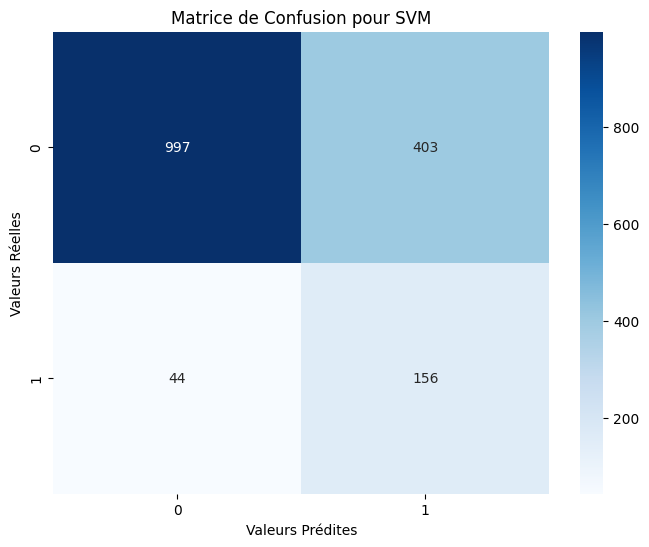

In [16]:

# Affichage de la matrice de confusion pour SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion pour SVM")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()


# 8-description des modèles Choisis :
## 1. Random Forest Classifier (RFC) :
### Définition : 
Le RFC est un algorithme d'apprentissage ensembliste basé sur l'ensemble d'arbres de décision. Il combine plusieurs arbres de décision lors de l'entraînement et les fait voter pour la prédiction finale.
### Illustration :

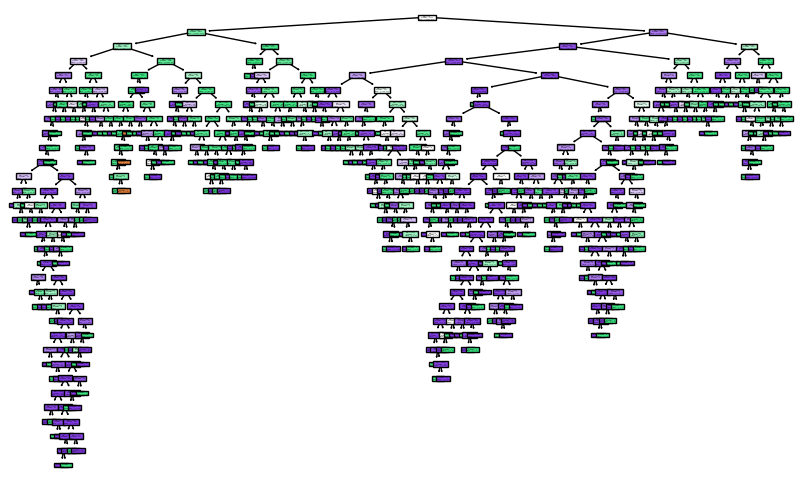

In [17]:
plt.figure(figsize=(10, 6))
plot_tree(tree_clf, filled=True, feature_names=data_numeric.columns)
plt.show()

### Explication des Étapes :
*  Prétraitement des données : Suppression des colonnes non numériques, gestion des valeurs manquantes, et division des données en ensembles d'entraînement et de test
*  Normalisation des données : Standardisation des données pour mettre à l'échelle les caractéristiques.
*  Équilibrage des classes : Utilisation de BorderlineSMOTE pour équilibrer les classes en suréchantillonnant les classes minoritaires.
*  Entraînement du modèle : Création d'un modèle d'arbre de décision, adaptation aux données d'entraînement équilibrées, et sélection des caractéristiques les plus importantes.
*  Évaluation du modèle : Entraînement d'un classificateur RandomForest sur les données d'entraînement équilibrées et sélectionnées, prédictions sur les données de test sélectionnées, calcul de l'accuracy et affichage de la matrice de confusion.sion.ion.

## 2. Support Vector Machine (SVM) :
### Définition :
 Le SVM est un algorithme d'apprentissage supervisé utilisé pour la classification et la régression. Il trouve l'hyperplan qui sépare au mieux les différentes classes en maximisant la marge entre les deux classes
### Illustration : 

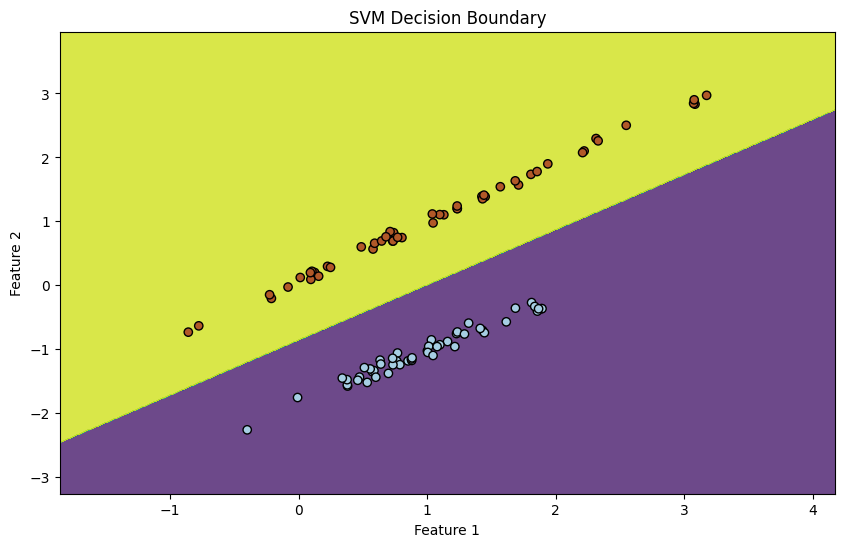

In [18]:
# Génération de données bidimensionnelles linéairement séparables
X, y = datasets.make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Création du classificateur SVM avec un noyau linéaire
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X, y)

# Création de la grille pour tracer la frontière de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tracer les données et la frontière de décision
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()


### Explication des Étapes :
*  
Prétraitement des données : Suppression des colonnes non numériques, gestion des valeurs manquantes, et division des données en ensembles d'entraînement et de test
*  
Normalisation des données : Standardisation des données pour mettre à l'échelle les caractéristique
*  .
Équilibrage des classes : Utilisation de BorderlineSMOTE pour équilibrer les classes en suréchantillonnant les classes minoritair
*  s.
Entraînement du modèle : Création d'un classificateur SVM avec un noyau linéaire, adaptation aux données d'entraînement équilibrées, et sélection des caractéristiques les plus importan
*  es.
Évaluation du modèle : Entraînement du SVM sur les données d'entraînement équilibrées et sélectionnées, prédictions sur l'ensemble de test sélectionné, calcul de l'accuracy et affichage de la matrice de confusion.

# 9-Optimisation des Modèles avec Validation Croisée

In [ ]:
# Optimisation des paramètres pour Random Forest avec validation croisée
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=4, scoring='accuracy')
grid_rf.fit(X_train_selected, y_train_resampled)

# Affichage des paramètres optimaux 
print("Meilleurs paramètres pour Random Forest:", grid_rf.best_params_)


# Optimisation des paramètres pour SVM avec validation croisée
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
}

grid_svm = GridSearchCV(SVC(kernel='linear', random_state=42), param_grid_svm, cv=4, scoring='accuracy')
grid_svm.fit(X_train_selected, y_train_resampled)

# Affichage des paramètres optimaux 
print("Meilleurs paramètres pour SVM:", grid_svm.best_params_)

# 10-Évaluation des Performances des Modèles


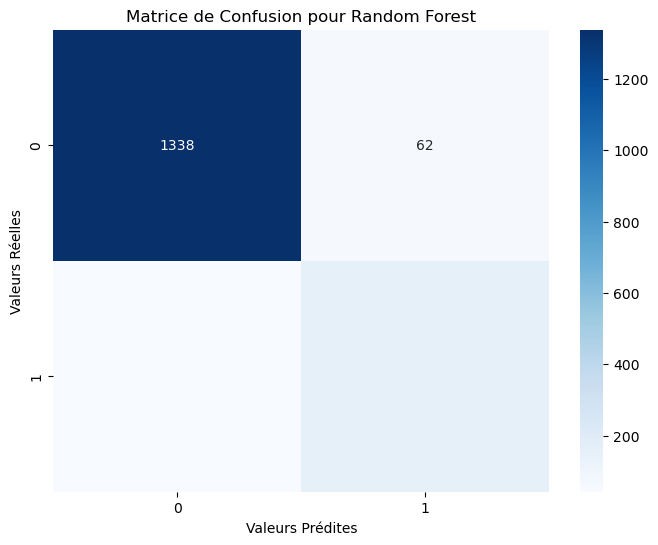

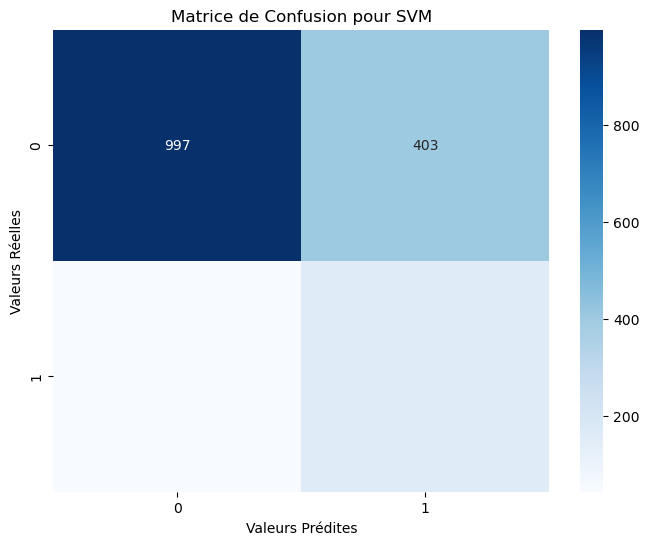

In [22]:
#Affichage de la matrice de confusion pour Random Forest
y_pred_svm = grid_svm.predict(X_test_selected)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
# Affichage de la matrice de confusion pour Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion pour Random Forest")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()


#Affichage de la matrice de confusion pour SVM
y_pred_rf = grid_rf.predict(X_test_selected)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix pour SVM:\n", conf_matrix_svm)

In [23]:
print("Classification Report pour Random Forest:\n", classification_report(y_test, y_pred_rf))
print("****************************************")
print("Classification Report pour SVM:\n", classification_report(y_test, y_pred_svm))

NameError: name 'y_pred_rf' is not defined